In [3]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay , classification_report , accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.dummy import DummyClassifier


In [5]:
df = pd.read_csv('framingham.csv')
df.head() 

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [6]:
df.shape


(4238, 16)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [ ]:
df.drop(columns = 'education', inplace = True)

In [8]:
df.isna().sum().sort_values(ascending = False)


glucose            388
education          105
BPMeds              53
totChol             50
cigsPerDay          29
BMI                 19
heartRate            1
male                 0
age                  0
currentSmoker        0
prevalentStroke      0
prevalentHyp         0
diabetes             0
sysBP                0
diaBP                0
TenYearCHD           0
dtype: int64

In [9]:
X = df.drop(columns=['TenYearCHD'])
target = df['TenYearCHD']

X_train , X_test , y_train , y_test = train_test_split(X ,target ,test_size=0.2 , random_state=42 )
print("X_train shape:", X_train.shape)


X_train shape: (3390, 15)


In [10]:
print("y_train shape:", y_train.shape)

y_train shape: (3390,)


In [11]:
print("X_test shape:", X_test.shape)

X_test shape: (848, 15)


In [12]:
print("y_test shape:", y_test.shape)

y_test shape: (848,)


In [13]:
LR_model = make_pipeline(
    SimpleImputer(strategy='mean'),
    MinMaxScaler(),
    LogisticRegression()
)
LR_model.fit(X_train,y_train)

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('minmaxscaler', MinMaxScaler()),
                ('logisticregression', LogisticRegression())])

In [14]:
y_training_pred = LR_model.predict(X_train)
y_testing_pred = LR_model.predict(X_test)

#get accuracy for training and testing
training_acc = accuracy_score(y_train, y_training_pred)
testing_acc = accuracy_score(y_test, y_testing_pred)

print(f"Training accuracy : {training_acc: .4f}")
print(f"Testing accuracy : {testing_acc: .4f}")

Training accuracy :  0.8543
Testing accuracy :  0.8573


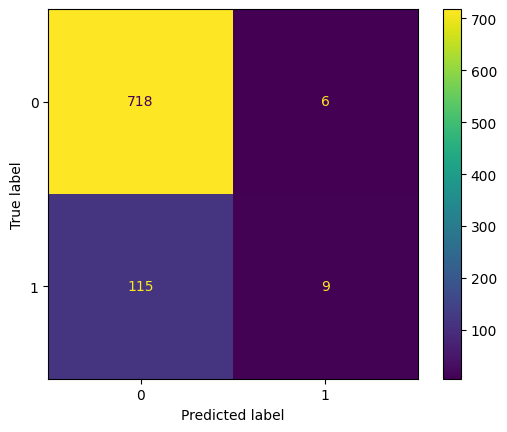

In [15]:
ConfusionMatrixDisplay.from_estimator(LR_model,X_test,y_test)

In [16]:
print(classification_report(y_test , LR_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92       724
           1       0.60      0.07      0.13       124

    accuracy                           0.86       848
   macro avg       0.73      0.53      0.53       848
weighted avg       0.82      0.86      0.81       848

